In [1]:
# %pip install tensorflow

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
df = load_breast_cancer(as_frame=True).frame

In [4]:
X = df.drop('target',axis=1)
y = df.target

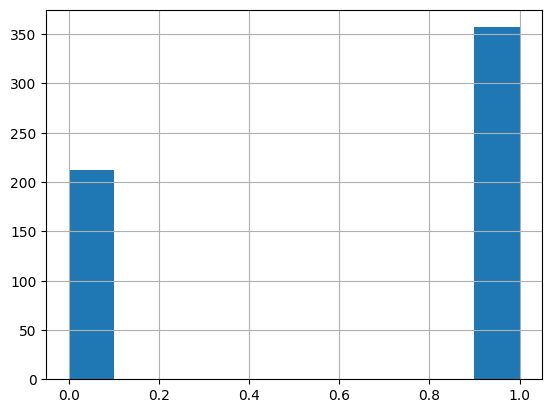

In [5]:
y.hist();

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

<Axes: >

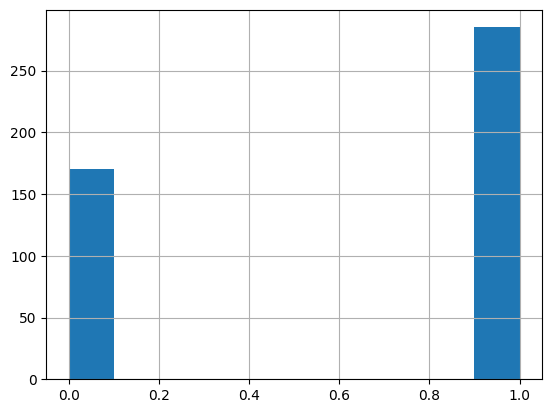

In [9]:
y_train.hist()

In [10]:
from sklearn.utils import class_weight

# Получение весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1.33823529, 0.79824561])

In [11]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/20
2/2 [==============================] - 0s 106ms/step - loss: 0.6322 - accuracy: 0.5187 - val_loss: 0.5961 - val_accuracy: 0.6228
Epoch 2/20
2/2 [==============================] - 0s 17ms/step - loss: 0.5103 - accuracy: 0.6989 - val_loss: 0.5003 - val_accuracy: 0.7807
Epoch 3/20
2/2 [==============================] - 0s 17ms/step - loss: 0.4196 - accuracy: 0.8505 - val_loss: 0.4268 - val_accuracy: 0.8421
Epoch 4/20
2/2 [==============================] - 0s 17ms/step - loss: 0.3510 - accuracy: 0.9143 - val_loss: 0.3685 - val_accuracy: 0.9035
Epoch 5/20
2/2 [==============================] - 0s 16ms/step - loss: 0.2979 - accuracy: 0.9385 - val_loss: 0.3214 - val_accuracy: 0.9035
Epoch 6/20
2/2 [==============================] - 0s 17ms/step - loss: 0.2550 - accuracy: 0.9451 - val_loss: 0.2825 - val_accuracy: 0.9211
Epoch 7/20
2/2 [==============================] - 0s 17ms/step - loss: 0.2211 - accuracy: 0.9473 - val_loss: 0.2502 - val_accuracy: 0.9386
Epoch 8/20
2/2 [==========

In [12]:
# Получение значений лосса и валидационного лосса из истории
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    # Построение графика лосса и валидационного лосса
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

C:\Users\pufis\AppData\Local\Temp\ipykernel_22408\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


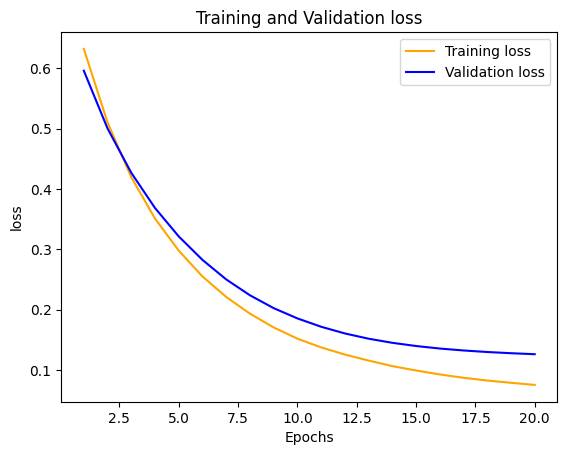

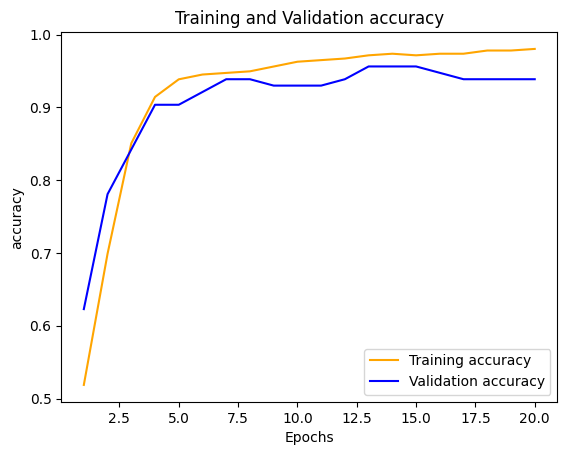

In [13]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [14]:
from keras.layers import Dense, BatchNormalization, Dropout

In [15]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [16]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

Epoch 1/20
2/2 [==============================] - 1s 100ms/step - loss: 0.6682 - accuracy: 0.6198 - val_loss: 0.5466 - val_accuracy: 0.8158
Epoch 2/20
2/2 [==============================] - 0s 17ms/step - loss: 0.3765 - accuracy: 0.8132 - val_loss: 0.4746 - val_accuracy: 0.8860
Epoch 3/20
2/2 [==============================] - 0s 18ms/step - loss: 0.2623 - accuracy: 0.8703 - val_loss: 0.4219 - val_accuracy: 0.9123
Epoch 4/20
2/2 [==============================] - 0s 17ms/step - loss: 0.2021 - accuracy: 0.9099 - val_loss: 0.3840 - val_accuracy: 0.9123
Epoch 5/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1652 - accuracy: 0.9297 - val_loss: 0.3561 - val_accuracy: 0.9035
Epoch 6/20
2/2 [==============================] - 0s 23ms/step - loss: 0.1402 - accuracy: 0.9429 - val_loss: 0.3352 - val_accuracy: 0.9035
Epoch 7/20
2/2 [==============================] - 0s 18ms/step - loss: 0.1261 - accuracy: 0.9648 - val_loss: 0.3189 - val_accuracy: 0.9123
Epoch 8/20
2/2 [==========

C:\Users\pufis\AppData\Local\Temp\ipykernel_22408\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


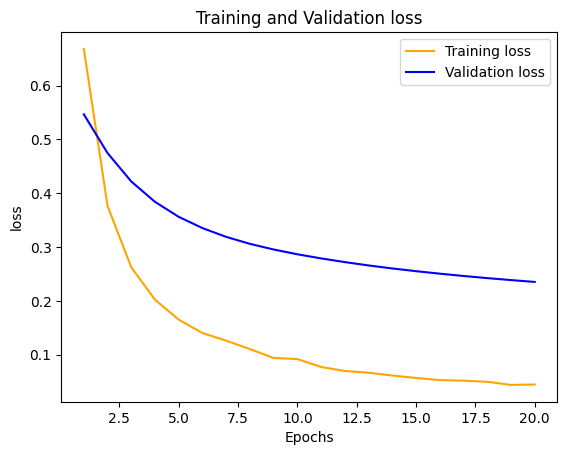

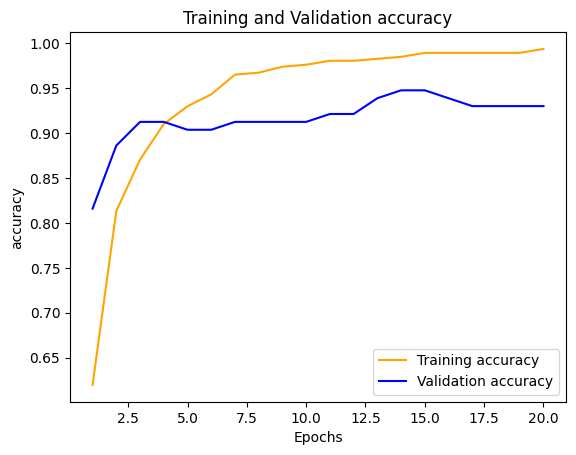

In [17]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [18]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [19]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

Epoch 1/20
2/2 [==============================] - 1s 101ms/step - loss: 0.8795 - accuracy: 0.4813 - val_loss: 0.5835 - val_accuracy: 0.7807
Epoch 2/20
2/2 [==============================] - 0s 18ms/step - loss: 0.4977 - accuracy: 0.7758 - val_loss: 0.4901 - val_accuracy: 0.9035
Epoch 3/20
2/2 [==============================] - 0s 18ms/step - loss: 0.3125 - accuracy: 0.8857 - val_loss: 0.4223 - val_accuracy: 0.9123
Epoch 4/20
2/2 [==============================] - 0s 18ms/step - loss: 0.2160 - accuracy: 0.9275 - val_loss: 0.3730 - val_accuracy: 0.9211
Epoch 5/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1841 - accuracy: 0.9363 - val_loss: 0.3363 - val_accuracy: 0.9211
Epoch 6/20
2/2 [==============================] - 0s 18ms/step - loss: 0.1613 - accuracy: 0.9473 - val_loss: 0.3086 - val_accuracy: 0.9211
Epoch 7/20
2/2 [==============================] - 0s 18ms/step - loss: 0.1386 - accuracy: 0.9451 - val_loss: 0.2868 - val_accuracy: 0.9211
Epoch 8/20
2/2 [==========

C:\Users\pufis\AppData\Local\Temp\ipykernel_22408\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


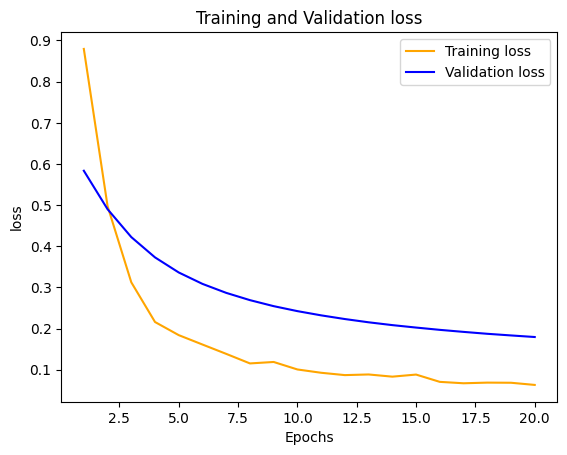

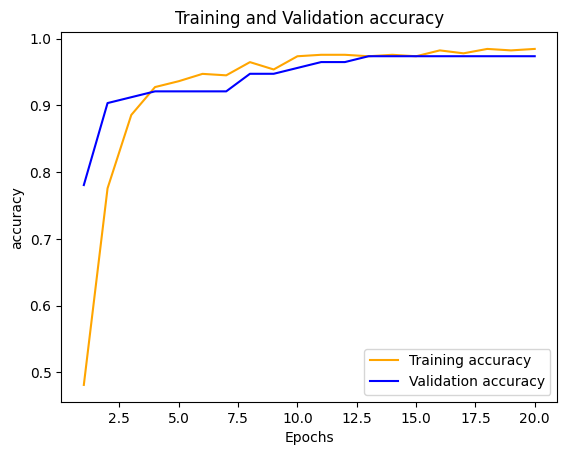

In [20]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [21]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [22]:
model.predict(X_val)

4/4 [==============================] - 0s 1ms/step


array([[1.38981175e-02],
       [9.69064355e-01],
       [1.93268761e-01],
       [5.45271158e-01],
       [4.38952446e-03],
       [8.53286684e-01],
       [9.52388942e-01],
       [8.75885319e-03],
       [5.51665537e-02],
       [1.26180344e-03],
       [8.77845645e-01],
       [8.63781050e-02],
       [9.29923296e-01],
       [5.35202175e-02],
       [2.12508306e-01],
       [7.24520385e-01],
       [4.41923469e-01],
       [6.24965429e-01],
       [9.48380351e-01],
       [6.98577940e-01],
       [1.14410982e-01],
       [2.83259183e-01],
       [9.47221458e-01],
       [8.89051318e-01],
       [8.86871874e-01],
       [7.30602145e-01],
       [2.26245378e-03],
       [8.48271489e-01],
       [8.98479283e-01],
       [9.17801023e-01],
       [7.23964393e-01],
       [9.49539900e-01],
       [8.94471049e-01],
       [6.96693301e-01],
       [2.79670469e-02],
       [4.83259737e-01],
       [9.20683622e-01],
       [7.44156957e-01],
       [6.58122659e-01],
       [3.61755043e-02],


In [23]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

4/4 [==============================] - 0s 667us/step


In [24]:
print(classification_report(y_val, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [26]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [37]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [42]:
model = create_model()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
save_best_weights = ModelCheckpoint(filepath='./',
                                    save_weights_only=True,
                                    monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True)

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]},
           callbacks=[early_stopping,save_best_weights])

Epoch 1/10
2/2 [==============================] - 0s 108ms/step - loss: 0.6818 - accuracy: 0.6791 - val_loss: 0.5778 - val_accuracy: 0.7807
Epoch 2/10
2/2 [==============================] - 0s 38ms/step - loss: 0.5442 - accuracy: 0.8769 - val_loss: 0.4849 - val_accuracy: 0.8947
Epoch 3/10
2/2 [==============================] - 0s 19ms/step - loss: 0.4446 - accuracy: 0.9275 - val_loss: 0.4134 - val_accuracy: 0.8860
Epoch 4/10
2/2 [==============================] - 0s 18ms/step - loss: 0.3684 - accuracy: 0.9407 - val_loss: 0.3569 - val_accuracy: 0.8947
Epoch 5/10
2/2 [==============================] - 0s 46ms/step - loss: 0.3108 - accuracy: 0.9451 - val_loss: 0.3102 - val_accuracy: 0.9035
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 0.2656 - accuracy: 0.9516 - val_loss: 0.2716 - val_accuracy: 0.9035
Epoch 7/10
2/2 [==============================] - 0s 38ms/step - loss: 0.2284 - accuracy: 0.9516 - val_loss: 0.2401 - val_accuracy: 0.9211
Epoch 8/10
2/2 [==========

In [48]:
model.load_weights("./")

In [49]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

4/4 [==============================] - 0s 667us/step


In [46]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_val, y_pred)

0.9385964912280702